# Recomendação ciente de contexto

In [1]:
import pandas as pd
import numpy as np

### Importar base de dados

In [2]:
# import wget
# !python3 -m wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
# !tar -xvzf ml-100k.zip

In [3]:
rating = pd.read_csv('./ml-100k/u.data', sep='\t', names=['userId', 'itemId', 'rating', 'timestamp'])
rating.drop('timestamp', axis=1, inplace=True)
rating.head()

,userId,itemId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [4]:
item = pd.read_csv('./ml-100k/u.item', sep="|", encoding='latin-1', header=None)
item.columns = ['itemId', 'title' ,'release','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item.drop(columns=['release', 'video release date', 'IMDb URL'], inplace=True)
item.head()

,itemId,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
#Load the Movies data
item = pd.read_csv('./ml-100k/u.item', sep="|", encoding='latin-1', header=None)
item.columns = ['itemId', 'title' ,'release','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item.drop(columns=['release', 'video release date', 'IMDb URL'], inplace=True)

item = item.melt(id_vars=['itemId', 'title'], var_name='genre')
item = item[item.value == 1]
item.drop(columns=['value'], inplace=True)
item[item['itemId']==1]

item.head()

,itemId,title,genre
266,267,unknown,unknown
1372,1373,Good Morning (1971),unknown
1683,2,GoldenEye (1995),Action
1685,4,Get Shorty (1995),Action
1698,17,From Dusk Till Dawn (1996),Action


In [6]:
#Load the User data
user = pd.read_csv('./ml-100k/u.user', sep='|', encoding='latin-1', header=None)
user.columns = ['userId', 'age', 'gender', 'occupation', 'zipcode']
user.head()

,userId,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Implementação do Factorization Machines

### Mapeando usuários, itens e contexto no formato one-hot encoding

In [7]:
users_ext = np.sort(rating.userId.unique())
offset = 0
map_users = {user: idx+offset for idx, user in enumerate(users_ext)}
map_users

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [8]:
items_ext = np.sort(rating.itemId.unique())
offset += len(map_users)
map_items = {item: idx+offset for idx, item in enumerate(items_ext)}
map_items

{1: 943,
 2: 944,
 3: 945,
 4: 946,
 5: 947,
 6: 948,
 7: 949,
 8: 950,
 9: 951,
 10: 952,
 11: 953,
 12: 954,
 13: 955,
 14: 956,
 15: 957,
 16: 958,
 17: 959,
 18: 960,
 19: 961,
 20: 962,
 21: 963,
 22: 964,
 23: 965,
 24: 966,
 25: 967,
 26: 968,
 27: 969,
 28: 970,
 29: 971,
 30: 972,
 31: 973,
 32: 974,
 33: 975,
 34: 976,
 35: 977,
 36: 978,
 37: 979,
 38: 980,
 39: 981,
 40: 982,
 41: 983,
 42: 984,
 43: 985,
 44: 986,
 45: 987,
 46: 988,
 47: 989,
 48: 990,
 49: 991,
 50: 992,
 51: 993,
 52: 994,
 53: 995,
 54: 996,
 55: 997,
 56: 998,
 57: 999,
 58: 1000,
 59: 1001,
 60: 1002,
 61: 1003,
 62: 1004,
 63: 1005,
 64: 1006,
 65: 1007,
 66: 1008,
 67: 1009,
 68: 1010,
 69: 1011,
 70: 1012,
 71: 1013,
 72: 1014,
 73: 1015,
 74: 1016,
 75: 1017,
 76: 1018,
 77: 1019,
 78: 1020,
 79: 1021,
 80: 1022,
 81: 1023,
 82: 1024,
 83: 1025,
 84: 1026,
 85: 1027,
 86: 1028,
 87: 1029,
 88: 1030,
 89: 1031,
 90: 1032,
 91: 1033,
 92: 1034,
 93: 1035,
 94: 1036,
 95: 1037,
 96: 1038,
 97: 1039,

In [9]:
genres_ext = np.sort(item.genre.unique())
offset += len(map_items)
map_genres = {genre: idx+offset for idx, genre in enumerate(genres_ext)}
map_genres

{'Action': 2625,
 'Adventure': 2626,
 'Animation': 2627,
 "Children's": 2628,
 'Comedy': 2629,
 'Crime': 2630,
 'Documentary': 2631,
 'Drama': 2632,
 'Fantasy': 2633,
 'Film-Noir': 2634,
 'Horror': 2635,
 'Musical': 2636,
 'Mystery': 2637,
 'Romance': 2638,
 'Sci-Fi': 2639,
 'Thriller': 2640,
 'War': 2641,
 'Western': 2642,
 'unknown': 2643}

In [10]:
occupation_ext = np.sort(user.occupation.unique())
offset += len(map_genres)
map_occupation = {occup: idx+offset for idx, occup in enumerate(occupation_ext)}
map_occupation

{'administrator': 2644,
 'artist': 2645,
 'doctor': 2646,
 'educator': 2647,
 'engineer': 2648,
 'entertainment': 2649,
 'executive': 2650,
 'healthcare': 2651,
 'homemaker': 2652,
 'lawyer': 2653,
 'librarian': 2654,
 'marketing': 2655,
 'none': 2656,
 'other': 2657,
 'programmer': 2658,
 'retired': 2659,
 'salesman': 2660,
 'scientist': 2661,
 'student': 2662,
 'technician': 2663,
 'writer': 2664}

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(rating, test_size=.2, random_state=2)

In [12]:
data_train = []
for i, row in train.iterrows():
    occup = map_occupation[user.loc[(user.userId==row['userId']), 'occupation'].iloc[0]]
    genres = [map_genres[l] for l in item.loc[(item.itemId==row['itemId']), 'genre'].tolist()]
    attr = []
    attr.append(map_users[row['userId']])
    attr.append(map_items[row['itemId']])
    attr += genres
    attr.append(occup)
    attr.append(row['rating'])
    data_train.append(attr)
data_train   

[[369, 1865, 2632, 2664, 4],
 [120, 1063, 2625, 2639, 2641, 2654, 2],
 [654, 1158, 2629, 2638, 2651, 4],
 [698, 1263, 2629, 2657, 3],
 [151, 1682, 2632, 2638, 2647, 4],
 [748, 1563, 2642, 2657, 3],
 [659, 1096, 2629, 2662, 4],
 [666, 1403, 2632, 2654, 4],
 [379, 1112, 2629, 2632, 2638, 2648, 4],
 [114, 1894, 2629, 2648, 5],
 [714, 1070, 2625, 2640, 2663, 3],
 [933, 1073, 2632, 2638, 2648, 4],
 [434, 1240, 2625, 2639, 2640, 2648, 4],
 [194, 2357, 2625, 2628, 2661, 1],
 [662, 1683, 2632, 2640, 2657, 4],
 [127, 1780, 2625, 2655, 5],
 [416, 1982, 2629, 2638, 2657, 2],
 [901, 1129, 2625, 2630, 2632, 2645, 3],
 [864, 1041, 2627, 2628, 2636, 2645, 1],
 [463, 1457, 2625, 2632, 2641, 2664, 5],
 [153, 1426, 2634, 2637, 2662, 4],
 [229, 1992, 2632, 2638, 2662, 3],
 [345, 1513, 2629, 2640, 2657, 3],
 [0, 1064, 2629, 2663, 3],
 [663, 1473, 2632, 2638, 2648, 2],
 [672, 1021, 2625, 2640, 2647, 5],
 [628, 1135, 2632, 2657, 5],
 [161, 1121, 2639, 2645, 3],
 [5, 1117, 2639, 2650, 4],
 [38, 1275, 2637, 2

In [13]:
data_test = []
for i, row in test.iterrows():
    occup = map_occupation[user.loc[(user.userId==row['userId']), 'occupation'].iloc[0]]
    genres = [map_genres[l] for l in item.loc[(item.itemId==row['itemId']), 'genre'].tolist()]
    attr = []
    attr.append(map_users[row['userId']])
    attr.append(map_items[row['itemId']])
    attr += genres
    attr.append(occup)
    attr.append(row['rating'])
    data_test.append(attr)
data_test  

[[156, 1215, 2625, 2630, 2640, 2648, 5],
 [404, 2007, 2631, 2641, 2651, 1],
 [243, 1492, 2625, 2640, 2663, 1],
 [377, 1710, 2626, 2628, 2662, 4],
 [278, 1969, 2625, 2658, 4],
 [918, 1053, 2629, 2638, 2657, 4],
 [21, 992, 2625, 2626, 2638, 2639, 2641, 2664, 5],
 [776, 1594, 2629, 2632, 2658, 5],
 [767, 1347, 2625, 2626, 2637, 2644, 4],
 [0, 952, 2632, 2641, 2663, 3],
 [416, 1165, 2632, 2640, 2657, 5],
 [496, 1347, 2625, 2626, 2637, 2662, 3],
 [457, 1217, 2632, 2638, 2663, 5],
 [239, 1295, 2625, 2635, 2639, 2647, 1],
 [882, 1042, 2630, 2632, 2640, 2654, 4],
 [233, 2272, 2632, 2659, 3],
 [95, 2174, 2631, 2645, 5],
 [915, 1510, 2625, 2638, 2640, 2648, 4],
 [84, 2091, 2632, 2647, 3],
 [223, 1686, 2632, 2641, 2647, 1],
 [0, 1140, 2640, 2663, 5],
 [620, 1093, 2626, 2628, 2629, 2662, 5],
 [665, 1448, 2632, 2644, 5],
 [290, 1227, 2632, 2662, 4],
 [255, 1169, 2625, 2626, 2639, 2656, 4],
 [409, 1296, 2629, 2638, 2645, 3],
 [520, 1347, 2625, 2626, 2637, 2662, 2],
 [649, 1305, 2625, 2648, 2],
 [307

In [14]:
n_attributes = max(max(x) for x in data_train)+1
n_attributes

2665

In [15]:
def predict(w0, w, v, x):
    pred = w0
    for i in range(len(x)-1):
        pred += w[x[i]]
        for j in range(i+1, len(x)-1):
            pred += np.dot(v[x[i]], v[x[j]])
            
    if pred < 0:
        pred = 0.0
    if pred > 5:
        pred = 5.0
        
    return pred

In [16]:
data_train[0]

[369, 1865, 2632, 2664, 4]

In [17]:
from math import sqrt

def train_fm(train, n_attr, dim=5, reg=0.01, lr=0.001, decay=0.1, miter=15):
    w0 = 0
    w = np.zeros(n_attr)
    v = np.random.normal(0.0, 0.1, (n_attr, dim))
    n_samples = len(train)
    
    error = []
    for t in range(miter):
        print('Iter #', t)
        sq_error = 0
        for s in range(n_samples):
            pred = predict(w0, w, v, train[s])
            e_ui = pred - train[s][-1]
            sq_error = sq_error + e_ui**2
            
            w0 = w0 - lr*(e_ui + reg * w0)
            
            for i in range(len(train[s])-1):
                
                w[train[s][i]] = w[train[s][i]] - lr*(e_ui + reg * w[train[s][i]])
                
                for f in range(dim):
                    sum_v = 0
                    for j in range(len(train[s])-1):
                        if train[s][i] != train[s][j]:
                            sum_v += v[train[s][j]][f]
                            
                    v[train[s][i]][f] = v[train[s][i]][f] - lr*(e_ui * sum_v + reg * v[train[s][i]][f])

        error.append(sqrt(sq_error/n_samples))
        lr = lr * (1. / (1. + decay * t))

    return w0, w, v, error

In [18]:
w0, w, v, error = train_fm(data_train, n_attributes)

Iter # 0
Iter # 1
Iter # 2
Iter # 3
Iter # 4
Iter # 5
Iter # 6
Iter # 7
Iter # 8
Iter # 9
Iter # 10
Iter # 11
Iter # 12
Iter # 13
Iter # 14


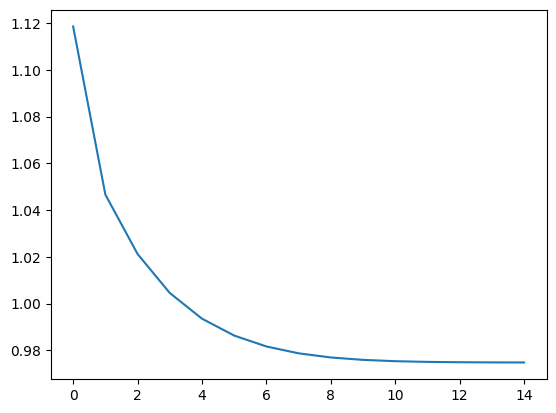

In [19]:
import matplotlib.pyplot as plt

plt.plot(error)
plt.show()

In [20]:
print(data_test[9])
print(predict(w0, w, v, data_test[9]))

[0, 952, 2632, 2641, 2663, 3]
4.063811139058337


In [21]:
def rmse(preds, ratings):
    if len(preds) != len(ratings):
        return -1
    sum = 0
    for i in range(len(preds)):
        sum += pow(preds[i]-ratings[i], 2)
    return sqrt(sum/len(preds))

In [22]:
ratings = []
preds = []
for sample in data_test:
    ratings.append(sample[-1])
    preds.append(predict(w0, w, v, sample))

In [23]:
rmse(preds, ratings)

0.9735379764519735